## Import libs

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_LAB_PID
from package_DBR import *

## PID()

In [6]:
help(package_LAB_PID.PID)

Help on function PID in module package_LAB_PID:

PID(Ts, previous, E, Kc, Ti, Td, alpha, approximationType, man=False, manMV=0, MVmin=0, MVmax=100)
    parameters : 
    • Ts : Sample time (seconds)
    • previous : dictionary with previous values for MVi, MVd, E (looks like : {"MVi": 0, "MVd": 0, "E": 0})
    • E : difference between PV and SP
    • Kc : PID gain
    • Ti : PID Integration time constant
    • Td : PID Derivation time constant
    • alpha : 
    • approximationType : list of approximation types for integration and derivation ( looks like : ["EBD", "TRAP"])
    • man : boolean, true if manual mode is enabled
    • manMV : manual MV value
    • MVmin : minimum value of MV (default : 0)
    • MVmax : maximum value of MV (default : 100)



## Set parameters for PID

In [7]:
Kc = 1.1
Ti = 10
Td = 5

alpha = 0.5

Ts = 0.01
TSim = 50

N = int(TSim/Ts)+1

t = []
SP = []
SPPath = {0: 0, 5: 20}

for i in range(0,N):
  t.append(i*Ts)
  SelectPath_RT(SPPath,t,SP)

previous = {"MVi": 0, "MVd": 0, "E": 0}

## Plot step response of PID

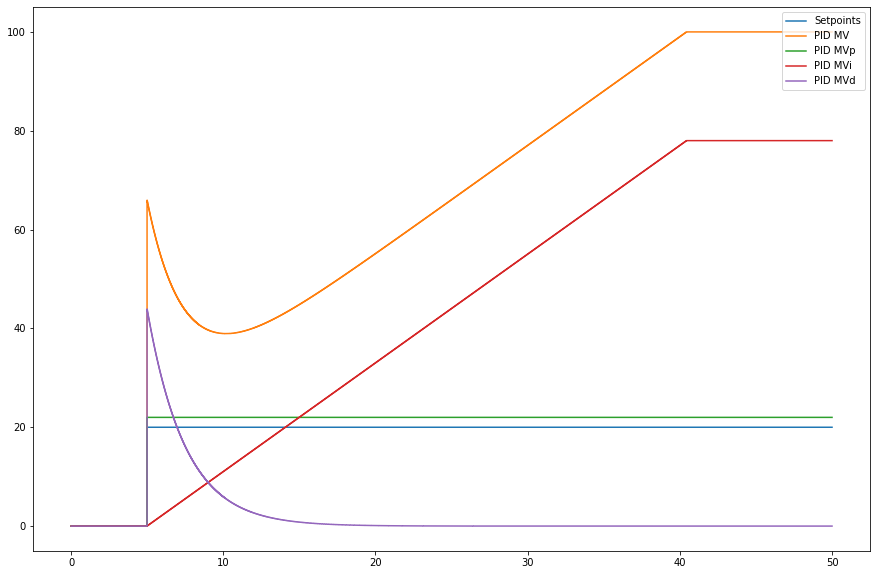

In [8]:
plotMV = []
plotMVp = []
plotMVi = []
plotMVd = []

for i in range(0, N):
  PID_OUT = package_LAB_PID.PID(Ts, previous, SP[i], Kc, Ti, Td, alpha, ["EBD", "TRAP"])
  previous = {"MVi": PID_OUT["MVi"], "MVd": PID_OUT["MVd"], "E": PID_OUT["E"]}
  plotMV.append(PID_OUT["MV"])
  plotMVp.append(PID_OUT["MVp"])
  plotMVi.append(PID_OUT["MVi"])
  plotMVd.append(PID_OUT["MVd"])

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.step(t, np.array(SP), label='Setpoints')
plt.step(t, np.array(plotMV), label='PID MV')
plt.step(t, np.array(plotMVp), label='PID MVp')
plt.step(t, np.array(plotMVi), label='PID MVi')
plt.step(t, np.array(plotMVd), label='PID MVd')

plt.legend(loc='upper right')



plt.show()